In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.model.data import __version__

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from src.base import logger
from src.config import get_config
from src.model.data import make_dataset
from src.model.preprocessing import PreProcessor

In [57]:
data_config = get_config(filename="config/model.yaml")

features_config = get_config(filename="config/features.yaml")

X,y  = make_dataset(data_config, download_bases=False)

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.25, random_state=42)

preprocessor = PreProcessor(features_config).fit(X_train)

X_train = preprocessor.transform(X_train)

X_test = preprocessor.transform(X_test)

classifier = LogisticRegression(solver="liblinear")

classifier.fit(X_train, y_train)

f1_score(y_test,classifier.predict(X_test), average = 'weighted')

0.6616297544117099

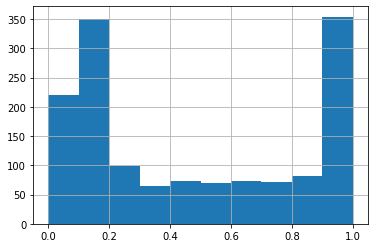

In [59]:
(X_train['x_maximum']).hist()
plt.show()

In [9]:
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' 